In [2]:
import tellurium as te

r = te.loadSBMLModel('MODEL1112110003_modified.xml')
print(r.getCurrentAntimony())

// Created by libAntimony v2.13.2
model *Gaetano2008_DiabetesProgressionModel()

  // Compartments and Species:
  compartment body;
  species $B in body, $lamda in body, $I in body, $h in body, $G in body;
  species $gamma_ in body;

  // Assignment Rules:
  lamda := lamdamin + eta*(x^3/(x^3 + 1));
  h := (G/Gh)^vh/(1 + (G/Gh)^vh);
  ImaxB := TigB/Kxi;
  G := gamma_/(rho + I);
  gamma_ := Tgl/Kxgi;
  rho := Kxg/Kxgi;
  x := X0*(G/Glamda);
  Tgl := (Kxgi*I0 + Kxg)*G0;
  TigB := Kxistart*I0/(B0*h0);
  ImaxB0 := 0.0287/0.05;
  Kag := Kxa*A0/(G0*((100 - A0)/100));
  lamdamax := lamdamin + eta;

  // Rate Rules:
  B' = lamda*B;
  I' = h*ImaxB*B;
  eta' = -KetaG*eta*G + Teta;
  Kxi' = Kxistart + ((time - t0)/(tmax - t0))*(Kxiend - Kxistart);
  A' = -Kxa*A + Kag*G*(100 - A)/100;

  // Species initializations:
  B = 1000;
  I = 50;

  // Compartment initializations:
  body = 1;

  // Variable initializations:
  Gh = 9;
  vh = 4;
  lamdamin = -0.02;
  eta = 0.04;
  Kxgi = 0.0001;
  B0 = 1000;
 

In [12]:
model_antimony = """
// Created by libAntimony v2.13.2
model *Gaetano2008_DiabetesProgressionModel()

  // Compartments and Species:
  compartment body;
  species $B in body, $lamda in body, $I in body, $h in body, $G in body;
  species $gamma_ in body;

  // Assignment Rules:
  lamda := lamdamin + eta*(x^3/(x^3 + 1));
  h := (G/Gh)^vh/(1 + (G/Gh)^vh); // hill function
  ImaxB := TigB/Kxi;
  G := gamma_/(rho + I);
  gamma_ := Tgl/Kxgi;
  rho := Kxg/Kxgi;
  x := X0*(G/Glamda);
  Tgl := (Kxgi*I0 + Kxg)*G0;
  TigB := Kxistart*I0/(B0*h0);
  ImaxB0 := 0.0287/0.05;
  Kag := Kxa*A0/(G0*((100 - A0)/100));
  lamdamax := lamdamin + eta;
  Kxi := Kxistart + ((time - t0)/(tmax - t0))*(Kxiend - Kxistart);
  I := h*ImaxB*B;

  // Rate Rules:
  B' = lamda*B;
  eta' = -KetaG*eta*G + Teta;
  A' = -Kxa*A + Kag*G*(100 - A)/100;

  // Species initializations:
  B = 1000;
  //I = 50;

  // Compartment initializations:
  body = 1;

  // Variable initializations:
  Gh = 9;
  vh = 4;
  lamdamin = -0.02;
  eta = 0.04;
  Kxgi = 0.0001;
  B0 = 1000;
  I0 = 50;
  G0 = 5;
  Glamda = 5;
  Kxg = 0;
  Kxistart = 0.05;
  h0 = 0.190519737844841;
  //Kxi = 0.05;
  t0 = 0;
  tmax = 90;
  Kxiend = 0.035;
  Kxgi0 = 0.0001;
  tI = 1;
  vi = 0.25;
  eta0 = 0.04;
  Teta = 0.0008;
  KetaG = 0.02;
  A0 = 5;
  Kxa = 0.238;
  teta10 = 1;
  X0 = 1;
  A = 5;

  // Other declarations:
  var ImaxB, rho, eta, x, Tgl, TigB, h0, Kxi, ImaxB0, Kag, lamdamax, A;
  const body, Gh, vh, lamdamin, Kxgi, B0, I0, G0, Glamda, Kxg, Kxistart, t0;
  const tmax, Kxiend, Kxgi0, tI, vi, eta0, Teta, KetaG, A0, Kxa, teta10, X0;

  // Display Names:
  B is "beta cell mass";
  lamda is "net beta cell growth";
  I is "fasting serum insulin ";
  h is "glucose effect on pancreas";
  G is "fasting plasma glucose ";
  gamma_ is "insulin resistance";
  rho is "Ratio of glucose uptake rate constant";
  lamdamin is "minimum lamda";
  Tgl is "liver glucose output";
  Kxgi is "Insulin sensitivity";
  B0 is "initial Beta cell mass";
  I0 is "insuliemia at t0";
  G0 is "glycemia at t0";
  Glamda is "maximal glycemia sensitivity";
  Kxg is "glucose uptake rate";
  TigB is "maximal insulin secretion";
  Kxistart is "insulin elimination basline";
  Kxi is "insulin elimination constant";
  t0 is "starting age";
  Kxiend is "insulin elimination end";
  Kxgi0 is "KxgI (t0)";
  tI is "midpoint Kxgi";
  vi is "exponent in Kxgl";
  ImaxB0 is "ImaxB (t0)";
  eta0 is "eta(t0)";
  Teta is "spontaneous recovery rate";
  KetaG is "glucose toxicity constant";
  Kag is "production of HbA1c";
  Kxa is "elimination of HbA1c";
  teta10 is "half life of pancreatic reserve";
end

Gaetano2008_DiabetesProgressionModel is "Gaetano2008_DiabetesProgressionModel"

Gaetano2008_DiabetesProgressionModel model_entity_is "http://identifiers.org/biomodels.db/MODEL1112110003"
Gaetano2008_DiabetesProgressionModel description "http://identifiers.org/pubmed/18780774"
Gaetano2008_DiabetesProgressionModel taxon "http://identifiers.org/taxonomy/9606"
Gaetano2008_DiabetesProgressionModel hypernym "http://identifiers.org/efo/0002614",
                                              "http://identifiers.org/go/GO:0032868"
"""

In [13]:
r = te.loadAntimonyModel(model_antimony)

Exception: Antimony: Error in model string, line 24:  Loop detected:  I's definition (h*ImaxB*B) either includes itself directly (i.e. 's5 := 6 + s5') or by proxy (i.e. 's5 := 8*d3' and 'd3 := 9*s5').

In [8]:
r.setIntegrator('gillespie')
r.getAvailableIntegrators()
r.setIntegrator('cvode')

In [18]:
r.reset()
result = r.simulate(0, 80, selections=['G', 'I'])

AttributeError: module 'collections' has no attribute 'Sequence'

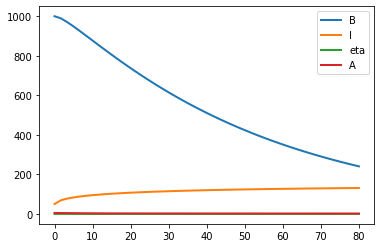

In [10]:
r.plot(result)

In [14]:
r.simulate?

Signature:
r.simulate(
    start=None,
    end=None,
    points=None,
    selections=None,
    output_file=None,
    steps=None,
)
Docstring:
Simulate and optionally plot current SBML model. This is the one stop shopping method
for simulation and plotting. 

simulate accepts up to five positional arguments. 

The first five (optional) arguments are treated as:

    1: Start Time, if this is a number. 

    2: End Time, if this is a number.

    3: Number of points, if this is a number.

    4: List of Selections. A list of variables to include in the output, e.g. ``['time','A']`` for a model with species ``A``. More below.

    5: output file path. The file to which simulation results will be written. If this is specified and
    nonempty, simulation output will be written to output_file every Config::K_ROWS_PER_WRITE generated.
    Note that simulate() will not return the result matrix if it is writing to output_file.
    It will also not keep any simulation data, so in that case one 

In [17]:
import collections